1. Реализовать генетический алгоритм для поиска кратчайшего пути на графе из видео #6
2. Для каждой итерации настройки алгоритма выводить в консоль индивида (набор маршрутов) с наибольшим значением fintess-функции

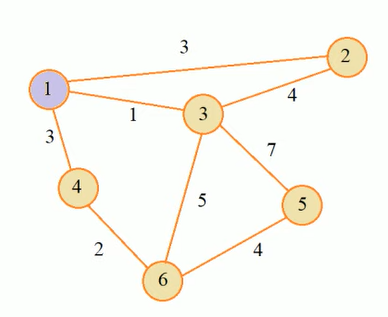

In [86]:
INF = 100
G = (
  (0,   3,   1,   3,   INF, INF),
  (3,   0,   4,   INF, INF, INF),
  (1,   4,   0,   INF, 7,   5  ),
  (3,   INF, INF, 0,   INF, 2  ),
  (INF, INF, 7,   INF, 0,   4  ),
  (INF, INF, 5,   2,   4,   0  ),
)

START, FINISH = 0, 5

В качестве фитнесс-функции посчитаем сумму кратчайших путей:

In [87]:
def fitness(paths):
  total_length = 0
  for vertex, path in enumerate(paths):
    path = path[:path.index(vertex)+1]
    cur = 0
    for nxt in path:
      total_length += G[cur][nxt]
      cur = nxt
  return total_length

Выбор популяций с наименьшим значением фитнесс-функции

In [88]:
import random
random.seed(42)

def select(populations, scores, selection_number):
  return [x[1] for x in sorted(zip(scores, populations))[:selection_number]]

Упорядоченное скрещивание:

In [89]:
def cross_over_aux(parent1, parent2, cross_rate):
  length = len(parent1)
  child1, child2 = parent1.copy(), parent2.copy()
  if random.random() < cross_rate:
    left_mid = random.randint(1, length - 1)
    right_mid = random.randint(1, length - 1)
    tail_len = len(parent1) - right_mid - 1
    
    if left_mid > right_mid:
      left_mid, right_mid = right_mid, left_mid
    
    mid1 = parent1[left_mid: right_mid+1]
    mid2 = parent2[left_mid: right_mid+1]

    p1 = parent1[right_mid+1:] + parent1[:right_mid+1]
    p1 = [x for x in p1 if x not in mid2]
    
    p2 = parent2[right_mid+1:] + parent2[:right_mid+1]
    p2 = [x for x in p2 if x not in mid1]

    child1 = p1[tail_len:] + mid2 + p1[:tail_len]
    child2 = p2[tail_len:] + mid1 + p2[:tail_len]

  return child1, child2

In [90]:
def cross_over(parent1, parent2, cross_rate):
  for idx, perms in enumerate(zip(parent1, parent2)):
    parent1[idx], parent2[idx] = cross_over_aux(perms[0], perms[1], cross_rate)
  return parent1, parent2

Мутация - меняем два случайных элемента пути местами:

In [91]:
def mutate_aux(child, mutation_rate):
  length = len(child)
  if random.random() < mutation_rate:
    idx1 = random.randint(0, length - 1)
    idx2 = random.randint(0, length - 1)
    child[idx1], child[idx2] = child[idx2], child[idx1]
  
  return child

In [92]:
def mutate(child, mutation_rate):
  for idx, val in enumerate(child):
    child[idx] = mutate_aux(val, mutation_rate)
  return child

В качестве начальной популяции выберем случайные перестановки вершин и запустим генетический алгоритм:

In [97]:
from numpy.random import permutation
import matplotlib.pyplot as plt

def genetic_algorithm(
  iterations,
  population_size,
  cross_rate,
  mutation_rate
):
  x, y = [], []
  populations = [
      [random.sample(range(len(G)), len(G)) for path_i in range(len(G))]
      for _ in range(population_size)
  ]
  ans, ans_score = populations[0], fitness(populations[0])

  for generation_idx in range(iterations):
    scores = [fitness(candidate) for candidate in populations]

    for idx, score in enumerate(scores):
      if score < ans_score:
        has_improvement = True
        ans, ans_score = populations[idx], score
    x.append(generation_idx)
    y.append(ans_score)
    
    best_pop = select(populations, scores, population_size)
    children = []

    for parent1, parent2 in zip(best_pop[::2], best_pop[1::2]):
      child1, child2 = cross_over(parent1, parent2, cross_rate)
      children += [
          mutate(child1, mutation_rate),
          mutate(child2, mutation_rate)
      ]
    
    populations = children
    print(f"Best individe: {ans}, fitness: {ans_score}")
  plt.plot(x, y)
  plt.show()


Best individe: [[0, 2, 4, 3, 1, 5], [2, 3, 4, 5, 1, 0], [5, 2, 3, 4, 0, 1], [3, 1, 5, 2, 0, 4], [3, 4, 5, 0, 1, 2], [5, 2, 1, 3, 4, 0]], fitness: 219
Best individe: [[0, 2, 4, 3, 1, 5], [2, 3, 4, 5, 1, 0], [5, 2, 3, 4, 0, 1], [3, 1, 5, 2, 0, 4], [3, 4, 5, 0, 1, 2], [3, 4, 1, 5, 0, 2]], fitness: 219
Best individe: [[0, 4, 3, 1, 5, 2], [1, 3, 0, 5, 4, 2], [2, 1, 5, 0, 3, 4], [1, 0, 3, 4, 5, 2], [2, 4, 3, 5, 0, 1], [4, 5, 1, 0, 2, 3]], fitness: 125
Best individe: [[1, 4, 5, 2, 0, 3], [1, 3, 0, 5, 4, 2], [2, 1, 5, 0, 3, 4], [1, 0, 3, 4, 5, 2], [2, 4, 3, 5, 0, 1], [5, 1, 0, 2, 3, 4]], fitness: 125
Best individe: [[1, 4, 5, 2, 0, 3], [1, 3, 0, 5, 4, 2], [2, 1, 5, 0, 3, 4], [3, 5, 1, 2, 0, 4], [2, 4, 3, 5, 0, 1], [5, 1, 0, 2, 3, 4]], fitness: 125
Best individe: [[1, 4, 5, 2, 0, 3], [1, 3, 0, 5, 4, 2], [2, 1, 5, 0, 3, 4], [3, 5, 1, 2, 0, 4], [2, 4, 3, 5, 0, 1], [5, 1, 0, 2, 3, 4]], fitness: 125
Best individe: [[0, 5, 2, 4, 1, 3], [1, 4, 5, 2, 0, 3], [2, 1, 5, 0, 4, 3], [3, 1, 0, 4, 2, 5], [2, 

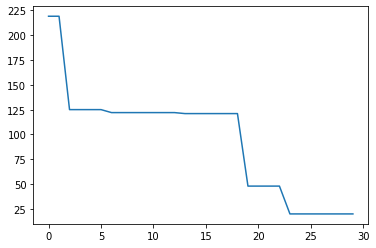

In [100]:
genetic_algorithm(30, 500, 0.9 / len(G), 0.1 / len(G))